## Assignment 11

In [3]:
# Import packages
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as ss
import pandas as pd
import numpy as np
import seaborn as sns

np.random.seed(12345678)  # for reproducibility, set random seed

# Read in data
df = pd.read_csv('../output.csv')

nvox = 64*64*48 # assume number of voxels per bin
df['weighted'] = df['synapses']/df['unmasked']*nvox

xvals = df['cx'].unique()
yvals = df['cy'].unique()
zvals = df['cz'].unique()

# Get rid of the blank edges
left = 0;
right = len(xvals);
top = 0;
bottom = len(yvals);
for z in zvals:
    this_z = df[df['cz']==z]
    
    # X direction
    xhist, bin_edges = np.histogram(this_z['cx'], weights = this_z['unmasked']/(nvox*len(yvals)), bins=len(xvals))
    
    left = max(left, np.argmax(xhist>0.5))
    right = min(right, len(xvals)-np.argmax(xhist[::-1]>0.5))
    
    # Y direction
    yhist, bin_edges = np.histogram(this_z['cy'], weights = this_z['unmasked']/(nvox*len(xvals)), bins=len(yvals))
    
    top = max(top, np.argmax(yhist>0.5))
    bottom = min(bottom, len(yvals)-np.argmax(yhist[::-1]>0.5))

# Copy new dataset without edges
df2 = df.copy()
for z in zvals:
    df2.drop(df2.index[(df2['cx']<xvals[left]) | (df2['cx']>=xvals[right])], inplace=True)
    df2.drop(df2.index[(df2['cy']<yvals[top]) | (df2['cy']>=yvals[bottom])], inplace=True)

xvals = df2['cx'].unique()
yvals = df2['cy'].unique()
zvals = df2['cz'].unique()

df2.head()

,cx,cy,cz,unmasked,synapses,weighted
6292,448,1369,55,126357,153,238.063772
6293,448,1369,166,139932,207,290.840237
6294,448,1369,277,150269,194,253.824488
6295,448,1369,388,138071,159,226.410122
6296,448,1369,499,150842,258,336.278119


### Testing independence assumption of weighted number of synapses (between and within Z slices)

In [2]:
out = pd.pivot_table(df2, index=('cx','cy'), columns='cz', values='weighted')
print out.shape

corr = np.corrcoef(out)

(3192, 11)


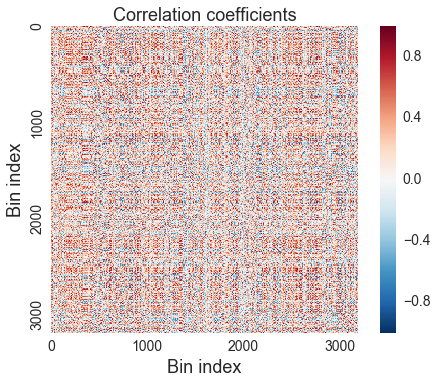

In [3]:
fs = 18
lfs = 14

plt.figure()
sns.heatmap(corr, square=True, xticklabels=1000, yticklabels=1000)
plt.xlabel('Bin index', fontsize=fs)
plt.ylabel('Bin index', fontsize=fs)
plt.title('Correlation coefficients', fontsize=fs)
plt.tick_params(axis='both', which='major', labelsize=lfs)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=lfs)
plt.show()

In [4]:
diag = corr.diagonal() * np.eye(corr.shape[0])
hollow = corr - diag
d_det = np.linalg.det(diag)
h_det = np.linalg.det(hollow)

print "Ratio of on- and off-diagonal determinants: " + str(d_det / h_det)
print "Bins are not independent within Z slices"

Ratio of on- and off-diagonal determinants: 7.23364749953e-25
Bins are not independent within Z slices


In [5]:
corr2 = np.corrcoef(out.T)

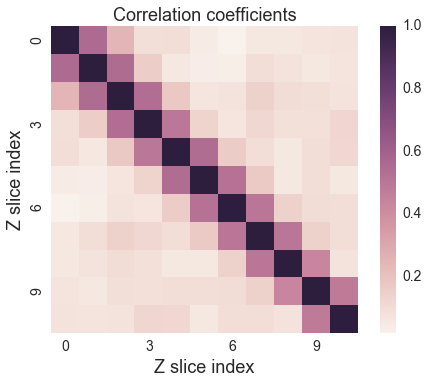

In [6]:
fs = 18
lfs = 14

plt.figure()
sns.heatmap(corr2, square=True, xticklabels=3, yticklabels=3)
plt.xlabel('Z slice index', fontsize=fs)
plt.ylabel('Z slice index', fontsize=fs)
plt.title('Correlation coefficients', fontsize=fs)
plt.tick_params(axis='both', which='major', labelsize=lfs)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=lfs)
plt.show()

In [7]:
diag2 = corr2.diagonal() * np.eye(corr2.shape[0])
hollow2 = corr2 - diag2
d_det = np.linalg.det(diag2)
h_det = np.linalg.det(hollow2)

print "Ratio of on- and off-diagonal determinants: " + str(d_det / h_det)
print "Bins are independent between Z slices"

Ratio of on- and off-diagonal determinants: 3786.08104973
Bins are independent between Z slices


### Testing identical distribution assumption of weighted number of synapses

Fitting and evaluating model with 1 clusters.
Fitting and evaluating model with 2 clusters.
Fitting and evaluating model with 3 clusters.
Fitting and evaluating model with 4 clusters.
Fitting and evaluating model with 5 clusters.
Fitting and evaluating model with 6 clusters.
Fitting and evaluating model with 7 clusters.
Fitting and evaluating model with 8 clusters.
Fitting and evaluating model with 9 clusters.
Fitting and evaluating model with 10 clusters.
Fitting and evaluating model with 11 clusters.
Fitting and evaluating model with 12 clusters.
Fitting and evaluating model with 13 clusters.
Fitting and evaluating model with 14 clusters.
Fitting and evaluating model with 15 clusters.
Fitting and evaluating model with 16 clusters.
Fitting and evaluating model with 17 clusters.
Fitting and evaluating model with 18 clusters.
Fitting and evaluating model with 19 clusters.
Fitting and evaluating model with 20 clusters.
Fitting and evaluating model with 21 clusters.
Fitting and evaluating

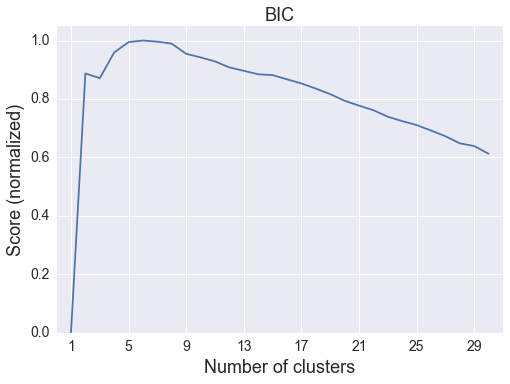

Optimal number of clusters is 6


In [8]:
import sklearn.mixture

out = df2['weighted'].reshape(-1,1)
nclusters = np.arange(1,31)

bic = np.array(())
for idx in nclusters:
    print "Fitting and evaluating model with " + str(idx) + " clusters."
    gmm = sklearn.mixture.GMM(n_components=idx, n_iter=1000, covariance_type = 'diag')
    gmm.fit(out)
    bic = np.append(bic, gmm.bic(out))

score = 1.0/bic
score = score - np.min(score)
score = score / np.max(score)

fs = 18
lfs = 14

plt.figure()
plt.plot(nclusters, score)
plt.title('BIC', fontsize=fs)
plt.ylabel('Score (normalized)', fontsize=fs)
plt.xlabel('Number of clusters', fontsize=fs)
plt.gca().set_xlim([0,31])
plt.gca().set_ylim([0,1.05])
plt.gca().set_xticks(nclusters[::4])
plt.tick_params(axis='both', which='major', labelsize=lfs)
plt.show()


optn = nclusters[np.argmin(bic)]
print "Optimal number of clusters is", optn

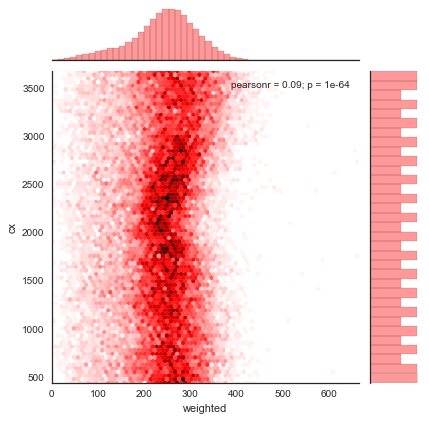

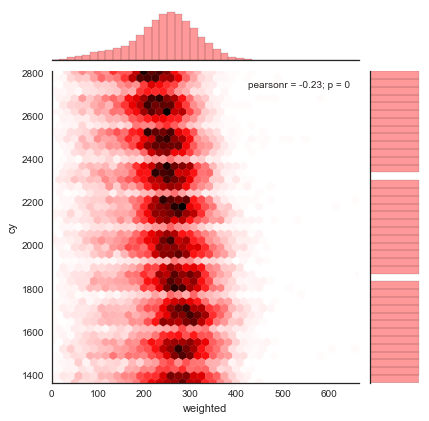

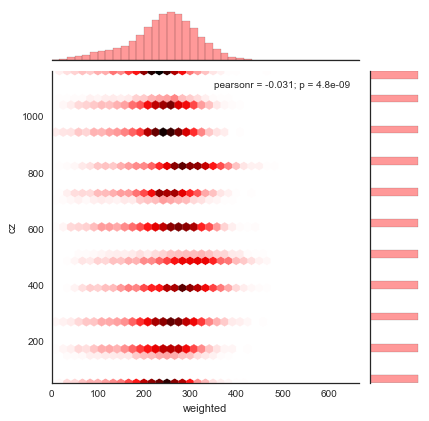

In [8]:
with sns.axes_style('white'):
    sns.jointplot(x='weighted', y='cx', data = df2,kind='hex', color='r'); 
#                   xlim=(np.min(grid_means)-0.02*np.ptp(grid_means),np.max(grid_means)+0.02*np.ptp(grid_means))  , 
#                   ylim=(np.min(grid_x)-0.02*np.ptp(grid_x),np.max(grid_x)+0.02*np.ptp(grid_x)),
#                   joint_kws={'gridsize':40}, marginal_kws={'bins':40}, stat_func=None);

with sns.axes_style('white'):
    sns.jointplot(x='weighted', y='cy', data = df2,kind='hex', color='r',joint_kws={'gridsize':40},marginal_kws={'bins':40}); 

with sns.axes_style('white'):
    sns.jointplot(x='weighted', y='cz', data = df2,kind='hex', color='r',joint_kws={'gridsize':40},marginal_kws={'bins':40}); 

-trend in y direction
-no trend in x and z direction

### K-means clustering based on optimal number of clusters

In [9]:
from sklearn.cluster import KMeans

est = KMeans(n_clusters = optn)
est.fit(df2['weighted'].reshape(-1,1))
labels = est.labels_
df2['label'] = labels

df2.head()

,cx,cy,cz,unmasked,synapses,weighted,label
6292,448,1369,55,126357,153,238.063772,0
6293,448,1369,166,139932,207,290.840237,5
6294,448,1369,277,150269,194,253.824488,0
6295,448,1369,388,138071,159,226.410122,2
6296,448,1369,499,150842,258,336.278119,5


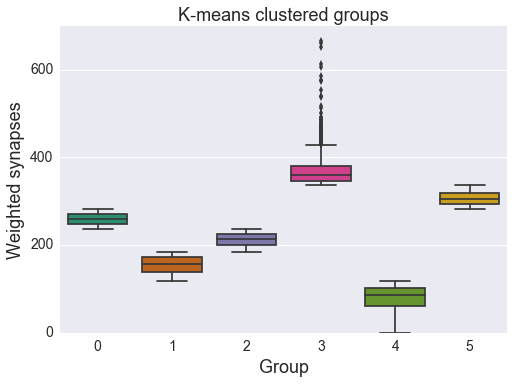

In [10]:
fs = 18
tfs = 14

plt.figure()
sns.boxplot(x='label', y='weighted', data=df2, palette='Dark2')
plt.yticks(np.arange(0,700,200))
plt.xlabel('Group', fontsize=fs)
plt.ylabel('Weighted synapses', fontsize=fs)
plt.title('K-means clustered groups', fontsize=fs)
plt.tick_params(axis='both', which='major', labelsize=tfs)
plt.show()

In [11]:
# Sort groups by means
groups = np.sort(df2['label'].unique())

means = np.array([df2.loc[df2['label']==label,'weighted'].mean() for label in groups])
print means
reindex = np.argsort(means)
print reindex

new_labels = np.array(labels)

for label in groups:
    new_labels[labels==label] = np.argmax(reindex==label)

df2['label'] = new_labels

means = np.array([df2.loc[df2['label']==label,'weighted'].mean() for label in groups])

df2.head()

[ 259.69842034  155.17545993  213.38507133  368.29115258   80.20085416
  306.70974311]
[4 1 2 0 5 3]


,cx,cy,cz,unmasked,synapses,weighted,label
6292,448,1369,55,126357,153,238.063772,3
6293,448,1369,166,139932,207,290.840237,4
6294,448,1369,277,150269,194,253.824488,3
6295,448,1369,388,138071,159,226.410122,2
6296,448,1369,499,150842,258,336.278119,4


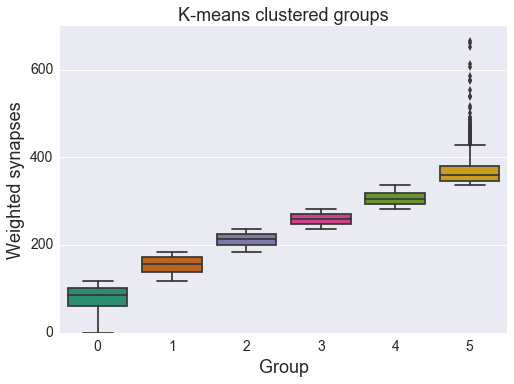

In [12]:
fs = 18
tfs = 14

plt.figure()
sns.boxplot(x='label', y='weighted', data=df2, palette='Dark2')
plt.yticks(np.arange(0,700,200))
plt.xlabel('Group', fontsize=fs)
plt.ylabel('Weighted synapses', fontsize=fs)
plt.title('K-means clustered groups', fontsize=fs)
plt.tick_params(axis='both', which='major', labelsize=tfs)
plt.show()

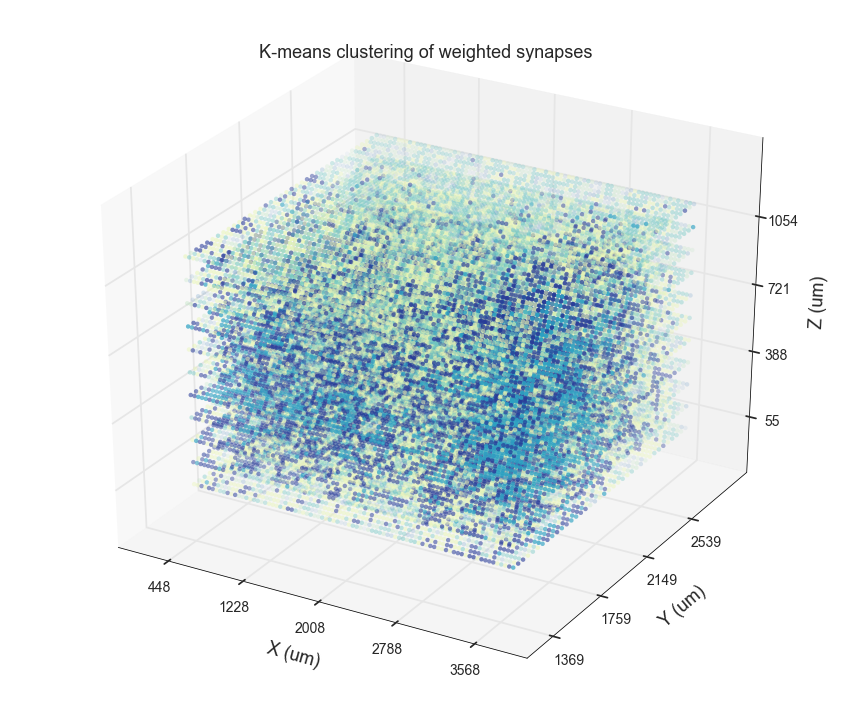

In [13]:
sns.set_style('white')

fs = 18
tfs = 14

wt_max = 400 #df2['weighted'].max()
wt_min = df2['weighted'].min()
cmap = np.array(sns.color_palette('YlGnBu'))
colors = [np.append(cmap[label], np.min((1,(wt-wt_min)/(wt_max-wt_min)))) for label, wt in zip(labels, df2['weighted'])]

ax = plt.figure(figsize=(12,10)).gca(projection='3d')
patches = ax.scatter(xs=df2['cx'], ys=df2['cy'], zs=df2['cz'], 
                     s=20, c=colors,
                     edgecolors=[0,0,0,0])
plt.xticks(df2['cx'].unique()[::20], fontsize=tfs)
plt.yticks(df2['cy'].unique()[::10], fontsize=tfs)
ax.zaxis.set_ticks(df2['cz'].unique()[::3])
plt.tick_params(axis='both', which='major', labelsize=tfs)
plt.xlabel('X (um)', fontsize=fs, labelpad=20)
plt.ylabel('Y (um)', fontsize=fs, labelpad=20)
plt.gca().set_zlabel('Z (um)', fontsize=fs, labelpad=20)
plt.title('K-means clustering of weighted synapses', fontsize=fs)
plt.tight_layout()
plt.show()

K-means clustering of weighted synapses


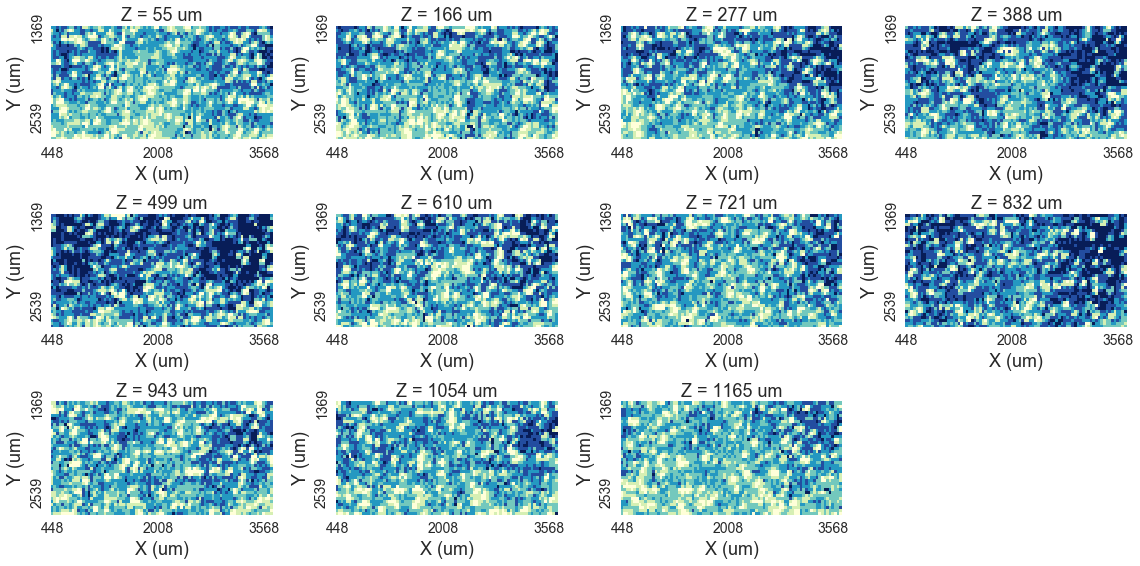

In [14]:
fs = 18
tfs = 14

plt.figure(figsize=(16,8))
print "K-means clustering of weighted synapses"
for zi, z in enumerate(zvals):
    XY = pd.pivot_table(df2[df2['cz']==z], index='cy', columns='cx', values='label')
    plt.subplot(3,4,1+zi)
    sns.heatmap(XY, xticklabels=40, yticklabels=30, 
                vmin=0, vmax=5, cbar=False, cmap=cm.get_cmap('YlGnBu', lut=optn))
    plt.gca().set_title('Z = '+str(z)+' um', fontsize=fs)
    plt.gca().set_xlabel('X (um)', fontsize=fs)
    plt.gca().set_ylabel('Y (um)', fontsize=fs)
    plt.tick_params(axis='both', which='major', labelsize=tfs)

plt.tight_layout()
plt.show()

### Correlation between weighted synapses and Z layers

Entropy with disk = 15


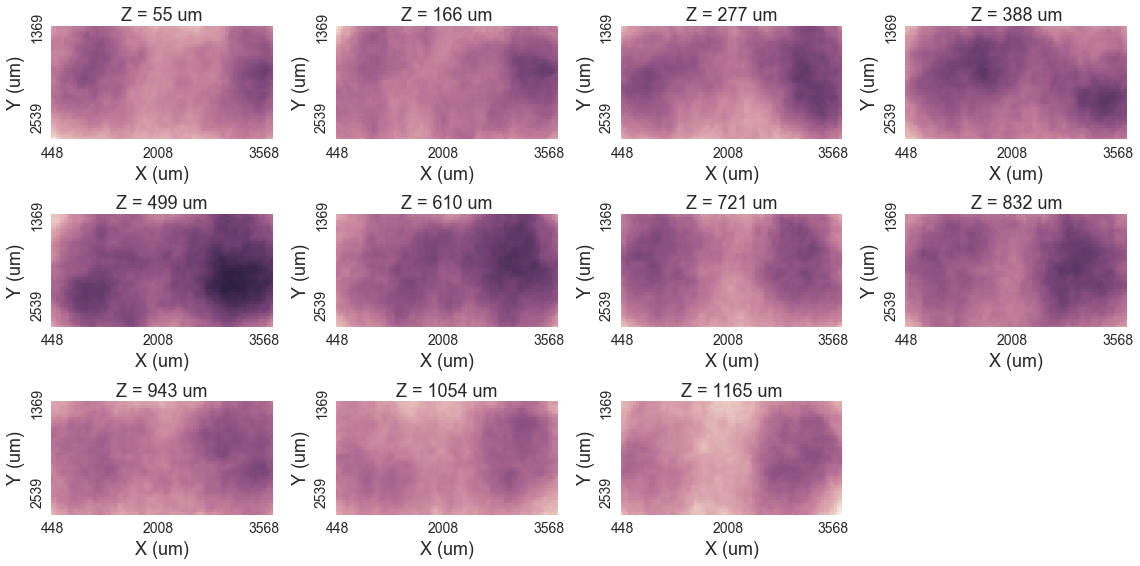

In [15]:
from skimage.filters.rank import entropy
from skimage.morphology import disk

wt_max = df2['weighted'].max()

S = np.array([
        pd.pivot_table(df2[df2['cx']==x], index='cy', columns='cz', values='weighted', aggfunc=np.sum).values 
        for x in xvals
    ])

d = 15 # disk size

print 'Entropy with disk =', d
df_list = []
vmin = float('inf')
vmax = -float('inf')
for zi, z in enumerate(zvals):
    imXY = np.rint(255*(S[:,:,zi].T/wt_max)).astype(np.uint8)
    
    tmpdf = pd.melt(pd.DataFrame(entropy(imXY, disk(d)), index=yvals, columns=xvals))
    tmpdf.columns = ['cx', 'entropy']
    tmpdf['cy'] = np.tile(yvals, len(xvals))
    tmpdf['cz'] = z
    
    df_list.append(tmpdf)
    
    vmin = np.min([vmin, np.min(df_list[-1]['entropy'].values.ravel())])
    vmax = np.max([vmax, np.max(df_list[-1]['entropy'].values.ravel())])

entdf = pd.concat(df_list)

plt.figure(figsize=(16,8))
for zi, z in enumerate(zvals):
    entXY = pd.pivot_table(entdf[entdf['cz']==z], index='cy', columns='cx', values='entropy')
    
    plt.subplot(3,4,1+zi)
    sns.heatmap(entXY, xticklabels=40, yticklabels=30, vmin=vmin, vmax=vmax, cbar=False)
    plt.gca().set_title('Z = '+str(z)+' um', fontsize=fs)
    plt.gca().set_xlabel('X (um)', fontsize=fs)
    plt.gca().set_ylabel('Y (um)', fontsize=fs)
    plt.tick_params(axis='both', which='major', labelsize=tfs)

plt.tight_layout()
plt.show()

In [16]:
df2 = df2.merge(entdf, on=['cx','cy','cz'])
df2.head()

,cx,cy,cz,unmasked,synapses,weighted,label,entropy
0,448,1369,55,126357,153,238.063772,3,6.161584
1,448,1369,166,139932,207,290.840237,4,5.897542
2,448,1369,277,150269,194,253.824488,3,6.026833
3,448,1369,388,138071,159,226.410122,2,6.085818
4,448,1369,499,150842,258,336.278119,4,6.007779


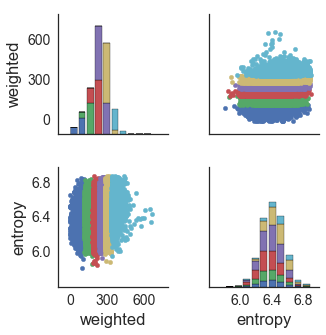

There doesn't appear to be any correlation


In [19]:
from matplotlib import ticker

with sns.plotting_context('notebook', font_scale=1.5):
    g = sns.PairGrid(df2, hue='label', vars=['weighted', 'entropy'])
    g = g.map_diag(plt.hist)
    g = g.map_offdiag(plt.scatter)

    for ax in g.axes.flat:
        ax.xaxis.set_major_locator(ticker.MaxNLocator(4, prune="both"))
        ax.yaxis.set_major_locator(ticker.MaxNLocator(4, prune="both"))

        ax.tick_params(axis='both', which='major', labelsize=tfs)
        
    plt.show()

print "There doesn't appear to be any correlation"